<a href="https://colab.research.google.com/github/harrisonkurunathan/emul8-sample-contiki-project/blob/master/jammingvehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 75.50%
Decision for vehicle with data [90, 180, 5]: Do not jam
Decision for vehicle with data [30, 90, 0]: Do not jam
Decision for vehicle with data [85, 270, 7]: Jam the suspicious vehicle
Decision for vehicle with data [100, 45, 1]: Do not jam
Decision for vehicle with data [60, 180, 8]: Do not jam


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


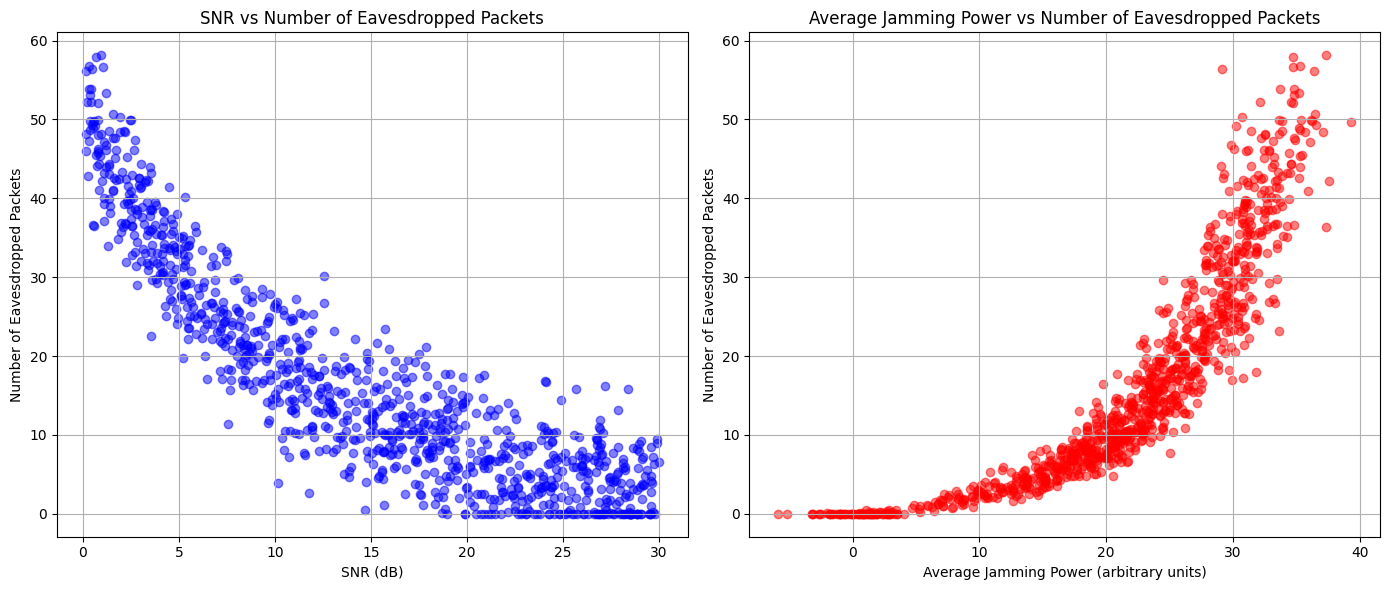

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Simulate Data Collection
np.random.seed(42)
num_samples = 1000
data = {
    'vehicle_id': np.arange(num_samples),
    'speed': np.random.uniform(20, 120, num_samples),  # speed in km/h
    'direction': np.random.uniform(0, 360, num_samples),  # direction in degrees
    'communication_attempts': np.random.randint(0, 10, num_samples),  # number of eavesdropping attempts
    'is_suspicious': np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% chance of being suspicious
}

df = pd.DataFrame(data)

# Step 2: Feature Engineering
# No additional features for simplicity

# Step 3: Model Training
X = df[['speed', 'direction', 'communication_attempts']]
y = df['is_suspicious']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Function to decide jamming based on model prediction
def should_jam(vehicle_data):
    prediction = clf.predict([vehicle_data])
    if prediction == 1:
        return "Jam the suspicious vehicle"
    else:
        return "Do not jam"

# Example usage
example_vehicle_data = [90, 180, 5]  # Speed, Direction, Communication Attempts
decision = should_jam(example_vehicle_data)
print(f"Decision for vehicle with data {example_vehicle_data}: {decision}")

# Integrate jamming decision with a function (simulation)
def handle_vehicles(vehicle_data_list):
    for vehicle_data in vehicle_data_list:
        decision = should_jam(vehicle_data)
        print(f"Decision for vehicle with data {vehicle_data}: {decision}")

# Example list of vehicle data (speed, direction, communication_attempts)
vehicles_to_check = [
    [30, 90, 0],
    [85, 270, 7],
    [100, 45, 1],
    [60, 180, 8]
]

handle_vehicles(vehicles_to_check)

# Plotting SNR vs Number of Eavesdropped Packets and Average Jamming Power vs Number of Eavesdropped Packets
# Simulating data
np.random.seed(42)
num_samples = 1000

# SNR values (Signal-to-Noise Ratio)
snr_values = np.random.uniform(0, 30, num_samples)  # SNR in dB

# Number of eavesdropped packets (assume it has some dependency on SNR)
num_eavesdropped_packets = (50 * np.exp(-0.1 * snr_values) + np.random.normal(0, 5, num_samples)).clip(min=0)

# Average jamming power (arbitrary function for simulation purposes)
average_jamming_power = 20 * np.log10(num_eavesdropped_packets + 1) + np.random.normal(0, 2, num_samples)

# Plotting SNR vs Number of Eavesdropped Packets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(snr_values, num_eavesdropped_packets, alpha=0.5, color='blue')
plt.title("SNR vs Number of Eavesdropped Packets")
plt.xlabel("SNR (dB)")
plt.ylabel("Number of Eavesdropped Packets")
plt.grid(True)

# Plotting Average Jamming Power vs Number of Eavesdropped Packets
plt.subplot(1, 2, 2)
plt.scatter(average_jamming_power, num_eavesdropped_packets, alpha=0.5, color='red')
plt.title("Average Jamming Power vs Number of Eavesdropped Packets")
plt.xlabel("Average Jamming Power")
plt.ylabel("Number of Eavesdropped Packets")
plt.grid(True)

plt.tight_layout()
plt.show()
